<a href="https://colab.research.google.com/github/Mirucla/Applied-Data-Management/blob/main/HW_Textbook_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 2.4

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy import stats
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import STL

In [ ]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/us_total.csv')

In [ ]:
df.head()

,year,state,y
0,1997,Alabama,324158
1,1998,Alabama,329134
2,1999,Alabama,337270
3,2000,Alabama,353614
4,2001,Alabama,332693


In [ ]:
df = df.rename(columns={'y': 'consumption'})
df.head()

,year,state,consumption
0,1997,Alabama,324158
1,1998,Alabama,329134
2,1999,Alabama,337270
3,2000,Alabama,353614
4,2001,Alabama,332693


In [ ]:
df.info

<bound method DataFrame.info of       year    state  consumption
0     1997  Alabama       324158
1     1998  Alabama       329134
2     1999  Alabama       337270
3     2000  Alabama       353614
4     2001  Alabama       332693
...    ...      ...          ...
1261  2015  Wyoming       119265
1262  2016  Wyoming       123351
1263  2017  Wyoming       149405
1264  2018  Wyoming       165384
1265  2019  Wyoming       154836

[1266 rows x 3 columns]>

In [ ]:
df = df.set_index(['state', 'year'])
df

consumption
state   year             
Alabama 1997       324158
        1998       329134
        1999       337270
        2000       353614
        2001       332693
...                   ...
Wyoming 2015       119265
        2016       123351
        2017       149405
        2018       165384
        2019       154836

[1266 rows x 1 columns]

In [ ]:
new_england_states = ['Maine', 'Vermont', 'New Hampshire', 'Massachusetts', 'Connecticut', 'Rhode Island']
new_england_state_gas_consumption = df.loc[new_england_states]
new_england_state_gas_consumption

consumption
state        year             
Maine        1997         6290
             1998         5716
             1999         6572
             2000        44779
             2001        95733
...                        ...
Rhode Island 2015        93886
             2016        85977
             2017        92061
             2018       101796
             2019        99301

[138 rows x 1 columns]

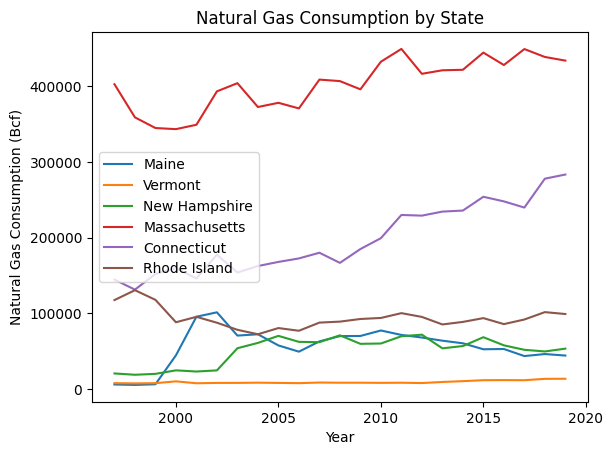

In [ ]:
fig, ax = plt.subplots()
for state in new_england_state_gas_consumption.index.get_level_values('state').unique():
    data = new_england_state_gas_consumption.loc[state]
    ax.plot(data.index, data['consumption'], label=state)
ax.set_title('Natural Gas Consumption by State')
ax.set_xlabel('Year')
ax.set_ylabel('Natural Gas Consumption (Bcf)')
ax.legend()
plt.show()

# Question 2.6

In [ ]:
aus_arrivals=pd.read_csv('/content/gdrive/MyDrive/aus_arrivals.csv')
aus_arrivals.head()

,Quarter,Origin,Arrivals
0,1981 Q1,Japan,14763
1,1981 Q2,Japan,9321
2,1981 Q3,Japan,10166
3,1981 Q4,Japan,19509
4,1982 Q1,Japan,17117


In [ ]:
aus_arrivals['Quarter'] = pd.to_datetime(aus_arrivals['Quarter'], format='%Y Q%m')

In [ ]:
aus_arrivals

,Quarter,Origin,Arrivals
0,1981-01-01,Japan,14763
1,1981-02-01,Japan,9321
2,1981-03-01,Japan,10166
3,1981-04-01,Japan,19509
4,1982-01-01,Japan,17117
...,...,...,...
503,2011-03-01,US,101925
504,2011-04-01,US,127150
505,2012-01-01,US,129520
506,2012-02-01,US,105700


In [ ]:
aus_arrivals.columns

Index(['Quarter', 'Origin', 'Arrivals'], dtype='object')

In [ ]:
aus_arrivals = aus_arrivals.set_index(['Origin', 'Quarter'])
aus_arrivals

Arrivals
Origin Quarter             
Japan  1981-01-01     14763
       1981-02-01      9321
       1981-03-01     10166
       1981-04-01     19509
       1982-01-01     17117
...                     ...
US     2011-03-01    101925
       2011-04-01    127150
       2012-01-01    129520
       2012-02-01    105700
       2012-03-01    106540

[508 rows x 1 columns]

In [ ]:
countries = aus_arrivals.index.get_level_values('Origin').unique()
print(countries)

Index(['Japan', 'NZ', 'UK', 'US'], dtype='object', name='Origin')


In [ ]:
countries = ['Japan', 'NZ', 'UK', 'US']
aus_arrivals_comparison = aus_arrivals.loc[countries]

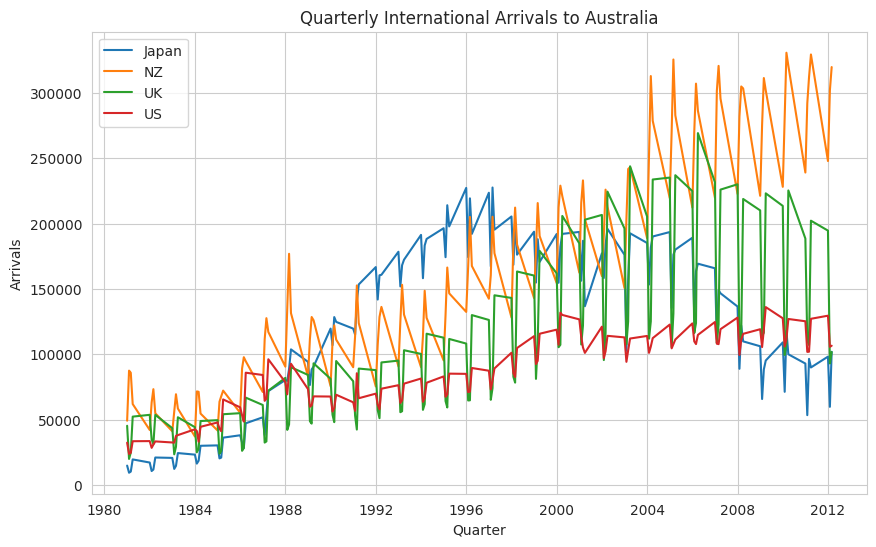

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for arrivals in aus_arrivals_comparison.index.get_level_values('Origin').unique():
    data = aus_arrivals_comparison.loc[arrivals]
    ax.plot(data.index, data['Arrivals'], label=arrivals)

ax.set_title('Quarterly International Arrivals to Australia')
ax.set_xlabel('Quarter')
ax.set_ylabel('Arrivals')
ax.legend()
plt.show()

Based on the graph, we observe that number of people from Japan arriving at Australia has significantly increased over time. Whereas from other three countries, increase is not that much significant and UK is more volatile. 

# Question 2.7

In [ ]:
aus_retail=pd.read_csv('/content/gdrive/MyDrive/aus_retail.csv')
aus_retail.head()

,State,Industry,Series ID,Month,Turnover
0,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Apr,4.4
1,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 May,3.4
2,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jun,3.6
3,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Jul,4.0
4,Australian Capital Territory,"Cafes, restaurants and catering services",A3349849A,1982 Aug,3.6


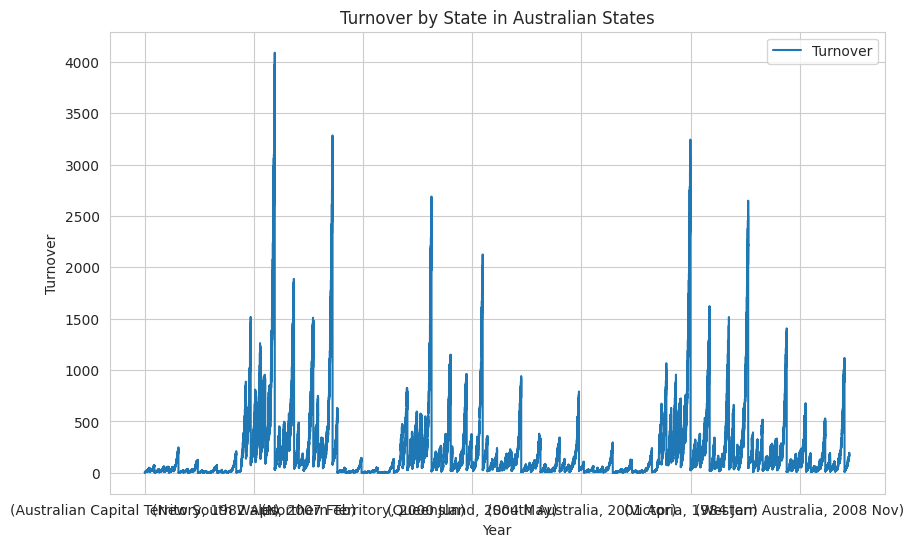

In [ ]:
# Set State and Month as index
df = aus_retail.set_index(['State', 'Month'])

# Create a time series plot
df.plot(figsize=(10, 6), title='Turnover by State in Australian States')
plt.xlabel('Year')
plt.ylabel('Turnover')
plt.show()

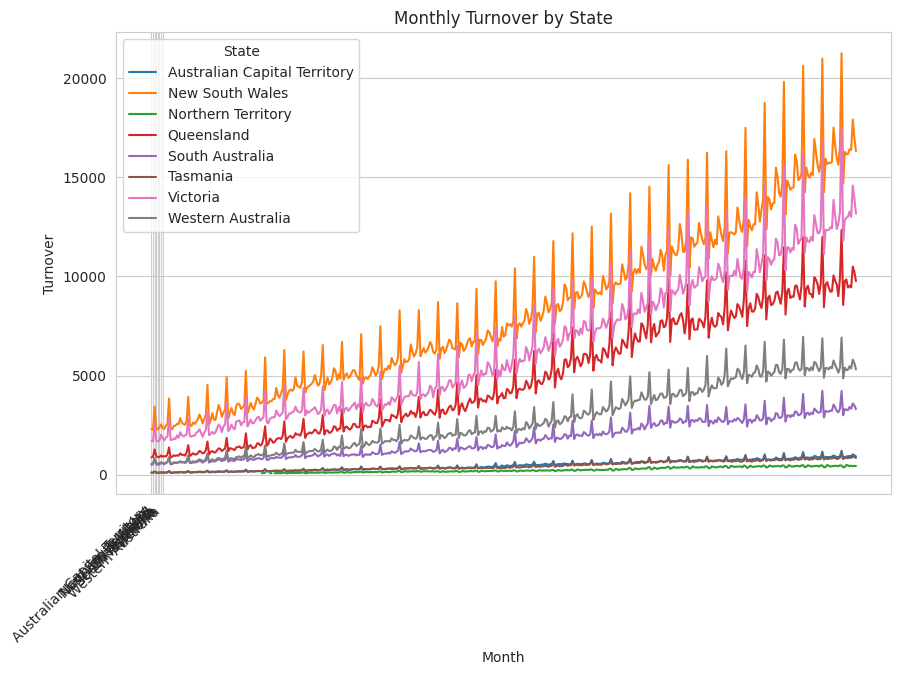

In [ ]:
# Set Month and State as index
# Plot turnover by month and state
fig, ax = plt.subplots(figsize=(10,6))
df.groupby(['Month', 'State'])['Turnover'].sum().unstack().plot(ax=ax)

# Set x-axis labels
ax.set_xticks(range(len(df.index.levels[0])))
ax.set_xticklabels(df.index.levels[0], rotation=45, ha='right')

# Set y-axis label
ax.set_ylabel('Turnover')

# Set plot title
plt.title('Monthly Turnover by State')

# Show plot
plt.show()

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


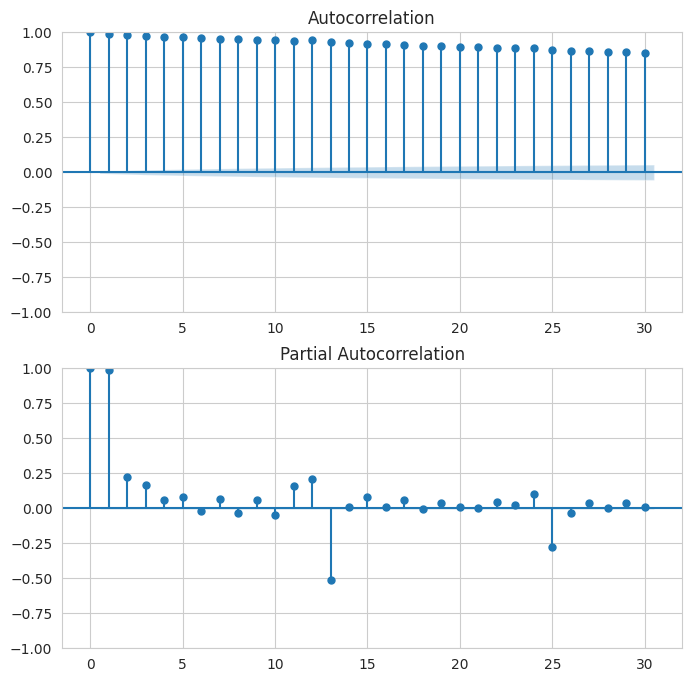

In [ ]:
# Load the data
df = pd.read_csv('/content/gdrive/MyDrive/aus_retail.csv', index_col=['Month', 'State'], parse_dates=['Month'])

# Create the ACF and PACF plots
fig, ax = plt.subplots(2, 1, figsize=(8, 8))
sm.graphics.tsa.plot_acf(df['Turnover'], lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(df['Turnover'], lags=30, ax=ax[1])
plt.show()

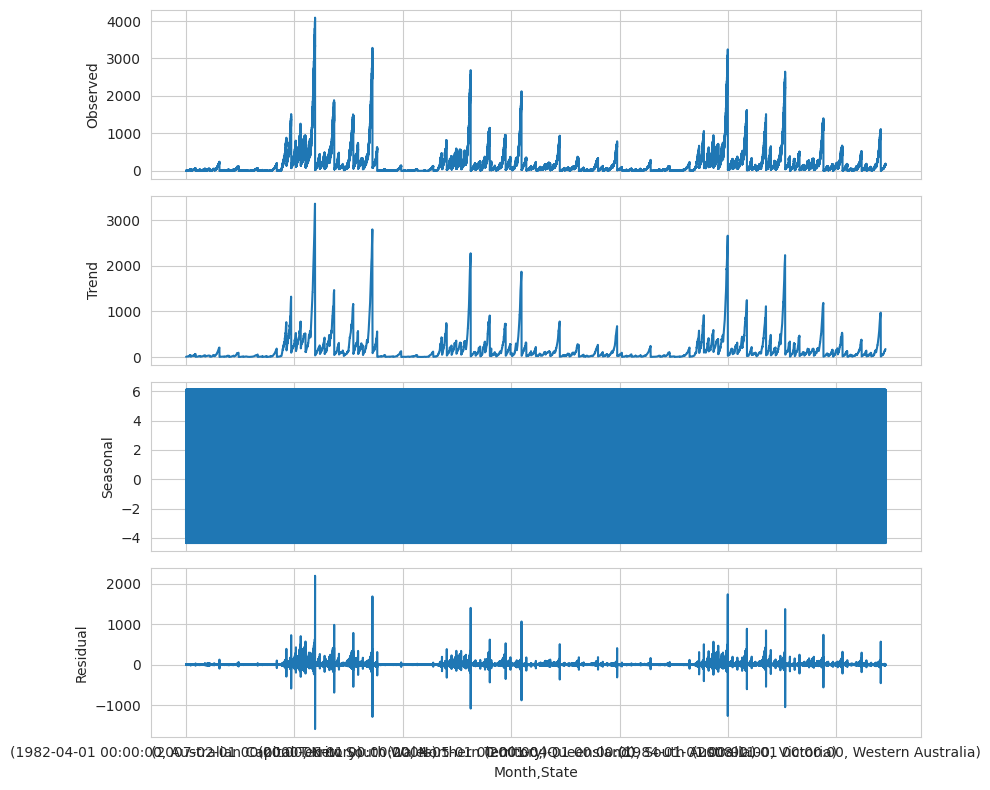

In [ ]:
# Seasonal decomposition
result = seasonal_decompose(df['Turnover'], model='additive', period=12)

# Plot decomposition
fig, axes = plt.subplots(ncols=1, nrows=4, sharex=True, figsize=(10,8))
result.observed.plot(ax=axes[0], legend=False)
axes[0].set_ylabel('Observed')
result.trend.plot(ax=axes[1], legend=False)
axes[1].set_ylabel('Trend')
result.seasonal.plot(ax=axes[2], legend=False)
axes[2].set_ylabel('Seasonal')
result.resid.plot(ax=axes[3], legend=False)
axes[3].set_ylabel('Residual')
plt.tight_layout()
plt.show()

As we observe, there is trend, seasonality and cyclicality in the data sets. From the residual plot, we see that there is cyclicality. 

# Question 3.5

In [ ]:
aus_production = pd.read_csv("/content/gdrive/MyDrive/aus_production.csv")
aus_production

,Quarter,Beer,Tobacco,Bricks,Cement,Electricity,Gas
0,1956 Q1,284,5225.0,189.0,465,3923,5
1,1956 Q2,213,5178.0,204.0,532,4436,6
2,1956 Q3,227,5297.0,208.0,561,4806,7
3,1956 Q4,308,5681.0,197.0,570,4418,6
4,1957 Q1,262,5577.0,187.0,529,4339,5
...,...,...,...,...,...,...,...
213,2009 Q2,398,NaN,NaN,2160,57471,238
214,2009 Q3,419,NaN,NaN,2325,58394,252
215,2009 Q4,488,NaN,NaN,2273,57336,210
216,2010 Q1,414,NaN,NaN,1904,58309,205


In [ ]:
tobacco = aus_production["Tobacco"]

# Find the optimal lambda value for the Box-Cox transformation
opt_lambda, _ = stats.boxcox(tobacco.dropna())

# Print the optimal lambda value
print("Optimal lambda:", opt_lambda)

Optimal lambda: [122139.12223781 120594.90676511 124515.7329211  137411.75284737
 133882.83381617 136391.06675026 125178.25338748 153720.9304513
 140041.57707338 136051.32860496 141550.80283088 157711.6791774
 130548.42760803 144652.40421954 146730.92493339 169606.13709042
 147703.83684224 153791.30503292 130548.42760803 173930.00310432
 149166.69234131 150843.63206352 159060.34149939 173091.84112565
 150913.62236521 152315.40187895 153509.86273261 176524.75722106
 150179.19382808 157499.03699158 160661.73755368 180050.79805495
 144583.26837069 161267.91791095 198358.42255478 175829.29561395
 155447.79106311 160091.81972166 192324.0721739  169714.75383587
 132027.37629596 154848.04291781 191911.20046025 169678.54601478
 141516.45021172 175939.05243272 178358.71487366 172800.58174962
 157357.32173992 183522.88469394 200027.30945653 187163.10094689
 171201.19998504 190112.59228824 219740.90109737 197941.83459406
 177257.68093696 207472.01143513 217130.80631632 189065.67425894
 193902.853

<Axes: >

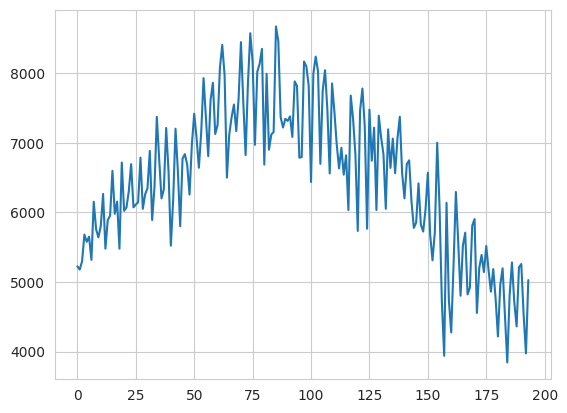

In [ ]:
tobacco.plot()

In [ ]:
ansett = pd.read_csv('/content/gdrive/MyDrive/ansett.csv')
ansett

,Week,Airports,Class,Passengers
0,1989 W28,ADL-PER,Business,193
1,1989 W29,ADL-PER,Business,254
2,1989 W30,ADL-PER,Business,185
3,1989 W31,ADL-PER,Business,254
4,1989 W32,ADL-PER,Business,191
...,...,...,...,...
7402,1992 W43,SYD-PER,First,203
7403,1992 W44,SYD-PER,First,137
7404,1992 W45,SYD-PER,First,161
7405,1992 W46,SYD-PER,First,155


In [ ]:
series = ansett[(ansett['Airports'] == 'MEL-SYD') & (ansett['Class'] == 'Economy')].set_index('Week')['Passengers']

In [ ]:
series.head()

Week
1987 W26    20167
1987 W27    20161
1987 W28    19993
1987 W29    20986
1987 W30    20497
Name: Passengers, dtype: int64

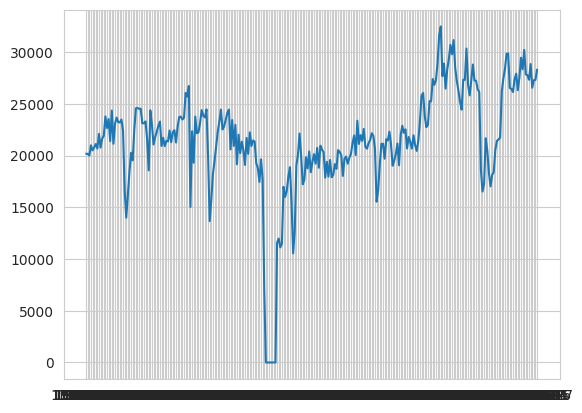

In [ ]:
plt.plot(series)
plt.show()

In [ ]:
series = series + np.abs(np.min(series)) + 1

# Applying Box-Cox transformation
transformed_data, best_lambda = boxcox(series)
print("Optimal lambda:", best_lambda)

Optimal lambda: 1.2663206632520727


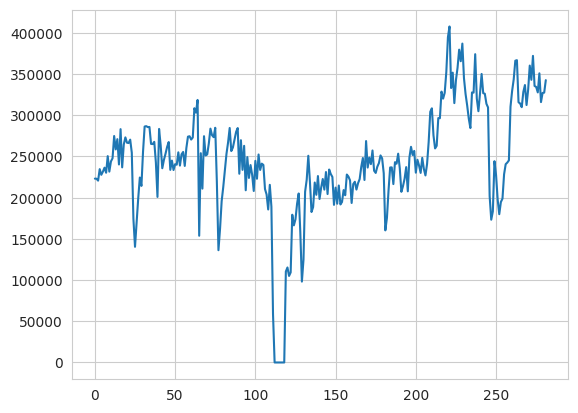

In [ ]:
plt.plot(transformed_data)
plt.show()

In [ ]:
pedestrian = pd.read_csv('/content/gdrive/MyDrive/pedestrian.csv')
pedestrian

,Sensor,Date_Time,Date,Time,Count
0,Birrarung Marr,2015-01-01,2015-01-01,0,1630
1,Birrarung Marr,2015-01-01 01:00:00,2015-01-01,1,826
2,Birrarung Marr,2015-01-01 02:00:00,2015-01-01,2,567
3,Birrarung Marr,2015-01-01 03:00:00,2015-01-01,3,264
4,Birrarung Marr,2015-01-01 04:00:00,2015-01-01,4,139
...,...,...,...,...,...
66032,Southern Cross Station,2016-12-31 19:00:00,2016-12-31,19,286
66033,Southern Cross Station,2016-12-31 20:00:00,2016-12-31,20,464
66034,Southern Cross Station,2016-12-31 21:00:00,2016-12-31,21,327
66035,Southern Cross Station,2016-12-31 22:00:00,2016-12-31,22,652


In [ ]:
series_p = pedestrian[pedestrian['Sensor'] == 'Southern Cross Station']['Count']

In [ ]:
# Apply the Box-Cox transformation
series_p = series_p + np.abs(np.min(series)) + 1
transformed_data, best_lambda = boxcox(series_p)

# Print the optimal value of lambda
print("Optimal lambda:", best_lambda)

Optimal lambda: 0.09185935255861878


# Question 3.7

In [ ]:
df_ped = pd.read_csv('/content/gdrive/MyDrive/pedestrian.csv')
df_ped

,Sensor,Date_Time,Date,Time,Count
0,Birrarung Marr,2015-01-01,2015-01-01,0,1630
1,Birrarung Marr,2015-01-01 01:00:00,2015-01-01,1,826
2,Birrarung Marr,2015-01-01 02:00:00,2015-01-01,2,567
3,Birrarung Marr,2015-01-01 03:00:00,2015-01-01,3,264
4,Birrarung Marr,2015-01-01 04:00:00,2015-01-01,4,139
...,...,...,...,...,...
66032,Southern Cross Station,2016-12-31 19:00:00,2016-12-31,19,286
66033,Southern Cross Station,2016-12-31 20:00:00,2016-12-31,20,464
66034,Southern Cross Station,2016-12-31 21:00:00,2016-12-31,21,327
66035,Southern Cross Station,2016-12-31 22:00:00,2016-12-31,22,652


In [ ]:
df_ped['Date_Time'] = pd.to_datetime(df_ped['Date_Time'])
df_ped.set_index('Date_Time', inplace=True)
df_ped.sort_index(inplace=True)

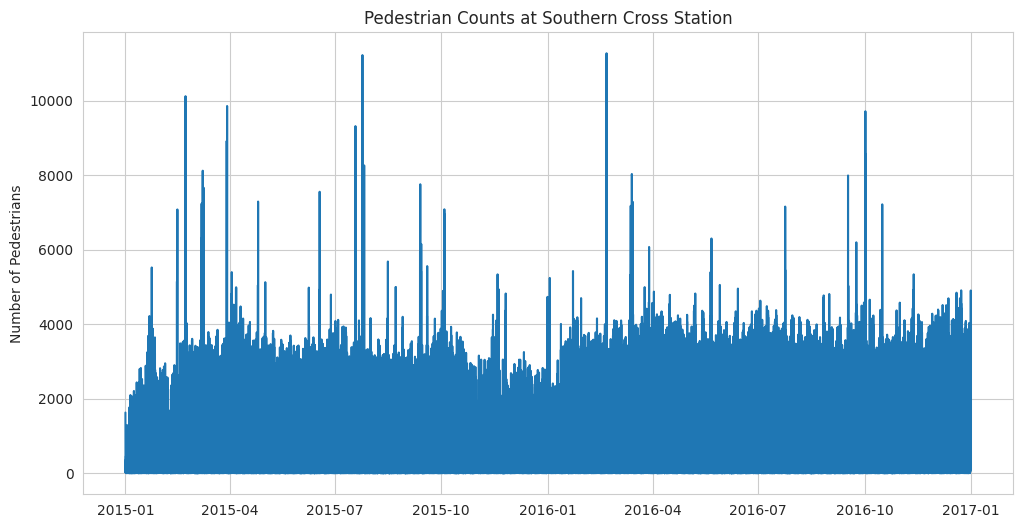

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df_ped['Count'])
plt.title('Pedestrian Counts at Southern Cross Station')
plt.ylabel('Number of Pedestrians')
plt.show()

In [ ]:

# Resample the data to a daily frequency and sum the counts
df_ped_daily = df_ped.resample('D').sum()

# Add a small epsilon value to avoid zero and negative values
df_ped_daily['Count'] = df_ped_daily['Count'] + np.finfo(float).eps

# Decompose the time series
decomposition = seasonal_decompose(df_ped_daily['Count'], model='multiplicative')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<ipython-input-103-65e44ac763d2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ped_daily = df_ped.resample('D').sum()


In [ ]:
trend

Date_Time
2015-01-01             NaN
2015-01-02             NaN
2015-01-03             NaN
2015-01-04    22906.857143
2015-01-05    24419.000000
                  ...     
2016-12-27    58635.571429
2016-12-28    60393.000000
2016-12-29             NaN
2016-12-30             NaN
2016-12-31             NaN
Freq: D, Name: trend, Length: 731, dtype: float64

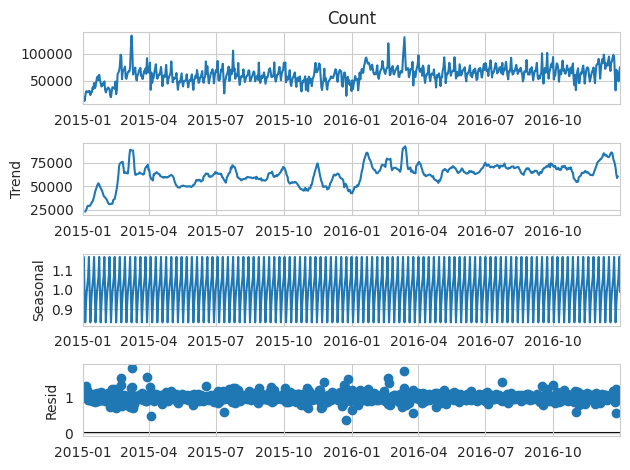

In [ ]:
decomposition.plot()
plt.show()

# Question 3.9 

a) Write about 3–5 sentences describing the results of the decomposition. Pay particular attention to the scales of the graphs in making your interpretation.

Yes, from the decomposition we observe that there is seasonality, trend and very little cyclical pattern at the data set. As scale varies, it is difficult to interpret the patterns and we need to transform the dataset to arrive at conclusion. 

b) Is the recession of 1991/1992 visible in the estimated components?

Yes, the recession is visible from the residual plot. 

# Question 3.10

In [ ]:
df_c=pd.read_csv('/content/gdrive/MyDrive/canadian.csv')
df_c

,Month,Volume
0,1960 Jan,1.4306
1,1960 Feb,1.3059
2,1960 Mar,1.4022
3,1960 Apr,1.1699
4,1960 May,1.1161
...,...,...
537,2004 Oct,17.8268
538,2004 Nov,17.8322
539,2004 Dec,19.4526
540,2005 Jan,19.5284


In [ ]:
df_c.columns

Index(['Month', 'Volume'], dtype='object')

In [ ]:
df_c['Month'] = pd.to_datetime(df_c['Month'], format='%Y %b')
df_c.set_index('Month', inplace=True)

In [ ]:
df_c

,Volume
Month,
1960-01-01,1.4306
1960-02-01,1.3059
1960-03-01,1.4022
1960-04-01,1.1699
1960-05-01,1.1161
...,...
2004-10-01,17.8268
2004-11-01,17.8322
2004-12-01,19.4526


In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

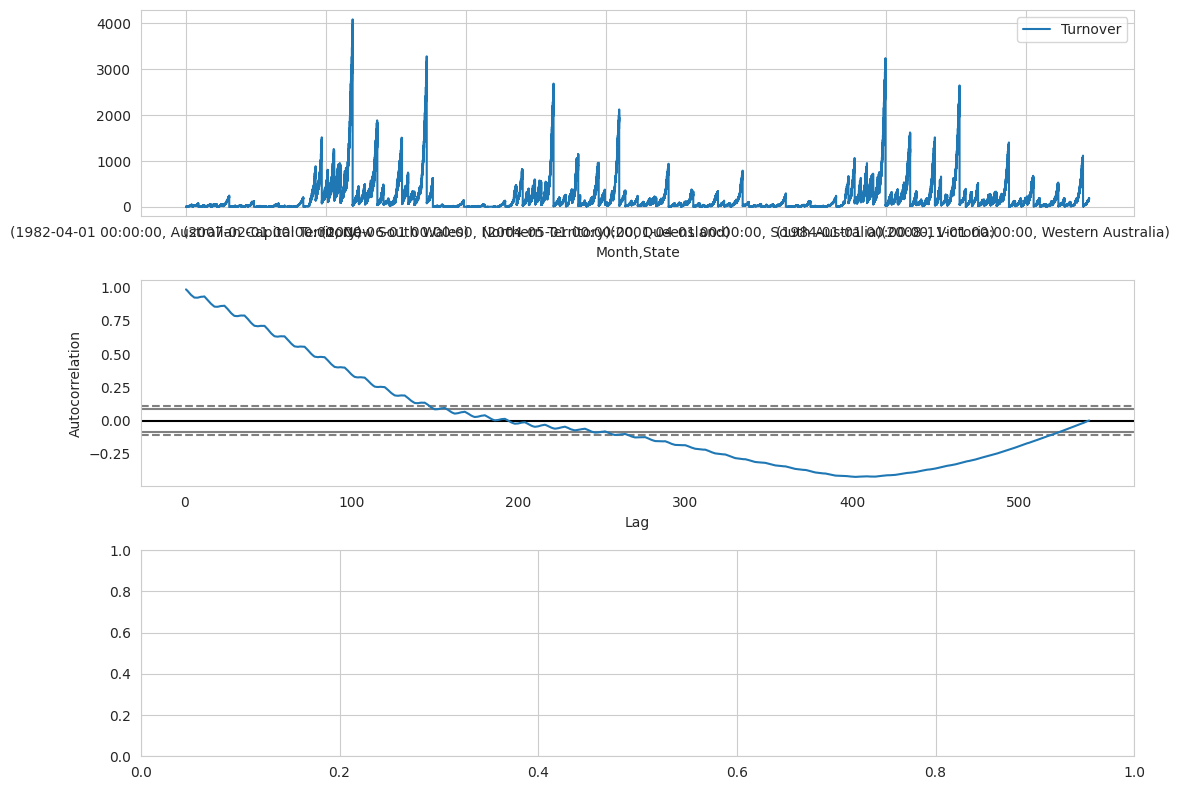

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(12, 8))
df.plot(ax=axes[0])
autocorrelation_plot(df_c, ax=axes[1])
plt.tight_layout()
plt.show()

In [ ]:
stl = STL(df_c, seasonal=365)
res = stl.fit()


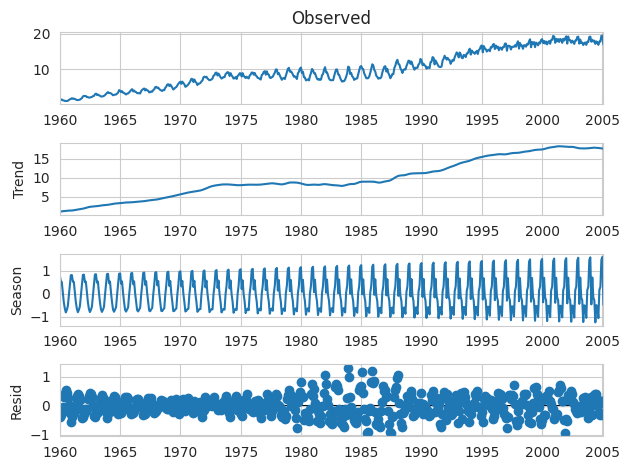

In [ ]:
fig = res.plot()
plt.show()

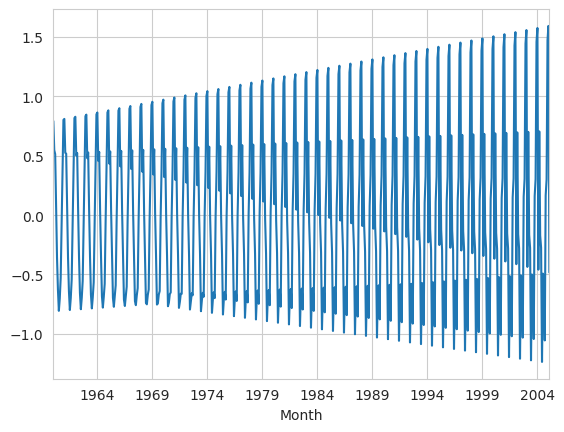

In [ ]:
seasonal = res.seasonal
seasonal.plot()
plt.show()